In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure to use the local version of powerlaw here, in case you have
# another version installed
import sys, os
import pathlib
sys.path.append(os.path.abspath(pathlib.Path(os.getcwd()).parent.resolve()))

import powerlaw

print(powerlaw.__version__)

# Since we have to save lots of figures
def savefig(fname):
    plt.savefig(os.path.join('source/images/', fname), bbox_inches='tight')

# Create the image directory if it doesn't exist
os.makedirs('source/images/', exist_ok=True)

2.0.1.dev6+gbcba72bd0.d20260219


## Loading data

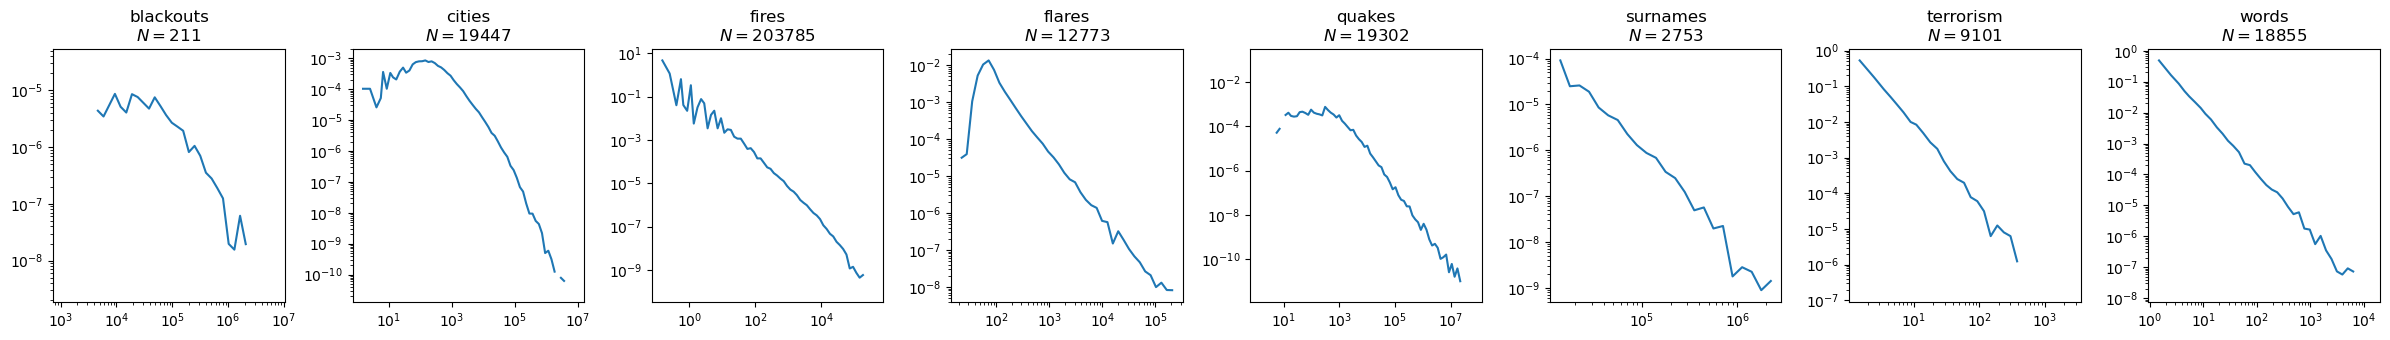

In [2]:
powerlaw.plot_test_datasets()
savefig('test_datasets.png')

## Visualization

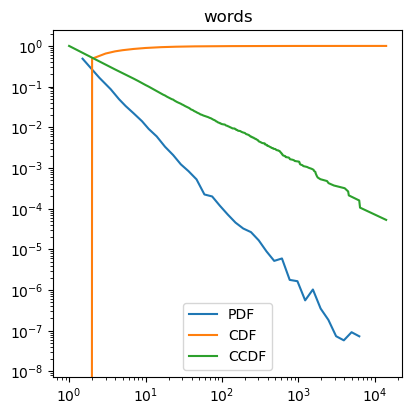

In [3]:
data = powerlaw.load_test_dataset('words')

# These accept matplotlib plot keywords like 'label'
powerlaw.plot_pdf(data, label='PDF')
powerlaw.plot_cdf(data, label='CDF')
powerlaw.plot_ccdf(data, label='CCDF')
plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_dists.png')
plt.show()

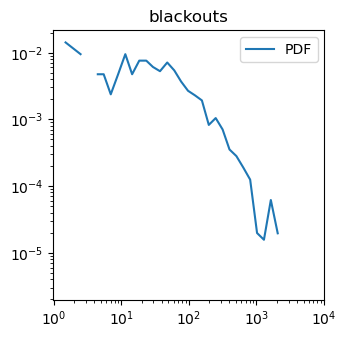

In [4]:
data = powerlaw.load_test_dataset('blackouts')

powerlaw.plot_pdf(data / 1e3, linear_bins=False, label='PDF')
plt.legend()
plt.title('blackouts')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf.png')
plt.show()

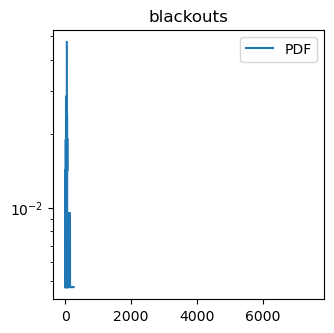

In [5]:
data = powerlaw.load_test_dataset('blackouts')

#powerlaw.plot_pdf(data, linear_bins=False, label='PDF')
powerlaw.plot_pdf(data / 1e3, linear_bins=True, label='PDF')
plt.legend()
plt.title('blackouts')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf_linear.png')
plt.show()

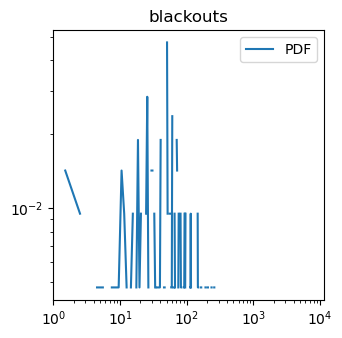

In [6]:
data = powerlaw.load_test_dataset('blackouts')

#powerlaw.plot_pdf(data, linear_bins=False, label='PDF')
powerlaw.plot_pdf(data / 1e3, linear_bins=True, label='PDF')
plt.legend()
plt.title('blackouts')
plt.xscale('log')
plt.gcf().set_size_inches((3.5,3.5))
savefig('blackouts_pdf_linear_log.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|██████████████████████| 20378/20378 [01:35<00:00, 213.93it/s]
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:816: UserWarning: Fitted parameters are very close to the edge of parameter ranges for distribution exponential; consider changing these ranges.
  warnings.warn(f'Fitted parameters are very close to the edge of parameter ranges for distribution {self.name}; consider changing these ranges.')


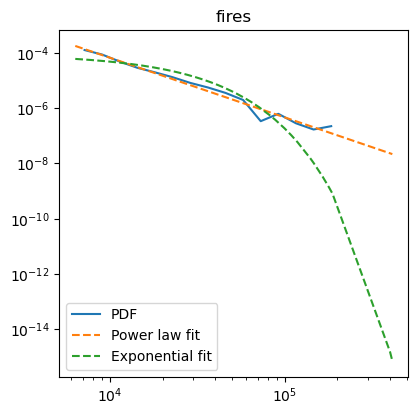

In [7]:
data = powerlaw.load_test_dataset('fires')

fit = powerlaw.Fit(data)

# Plot the distributions based on the data
# No need to pass the data since the Fit already has it
fit.plot_pdf(label='PDF')

# Plot some fits
fit.power_law.plot_pdf(linestyle='--', label='Power law fit')
fit.exponential.plot_pdf(linestyle='--', label='Exponential fit')
plt.title('fires')

plt.legend()
plt.gcf().set_size_inches((4.5,4.5))

savefig('fires_pdf_and_fit.png')
plt.show()

## Identifying the scaling range

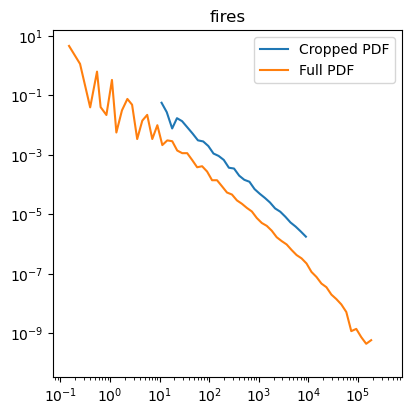

In [8]:
data = powerlaw.load_test_dataset('fires')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_pdf(label='Cropped PDF')
fit.plot_pdf(original_data=True, label='Full PDF')
plt.title('fires')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('fires_pdf_cropped.png')
plt.show()

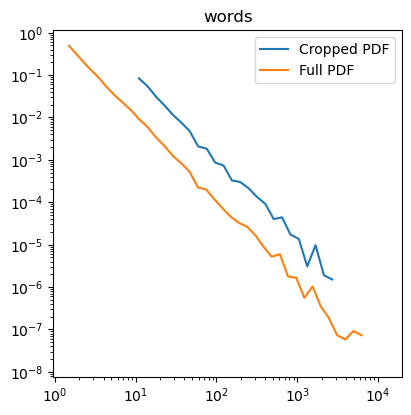

In [9]:
data = powerlaw.load_test_dataset('words')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_pdf(label='Cropped PDF')
fit.plot_pdf(original_data=True, label='Full PDF')
plt.title('words')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_pdf_cropped.png')
plt.show()

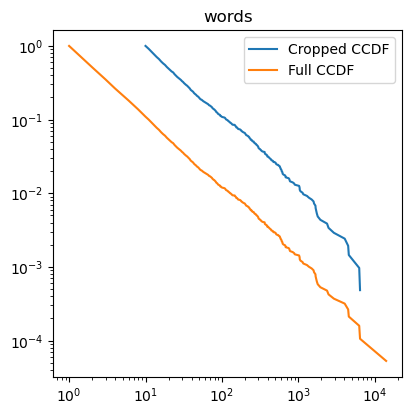

In [10]:
data = powerlaw.load_test_dataset('words')

xmin = 10
xmax = 1e4

fit = powerlaw.Fit(data, xmin=xmin, xmax=xmax)

fit.plot_ccdf(label='Cropped CCDF')
fit.plot_ccdf(original_data=True, label='Full CCDF')
plt.title('words')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_ccdf_cropped.png')
plt.show()

## Ranges and constraints

Calculating best minimal value for power law fit


Fitting xmin: 100%|█████████████████████████| 100/100 [00:00<00:00, 2044.56it/s]


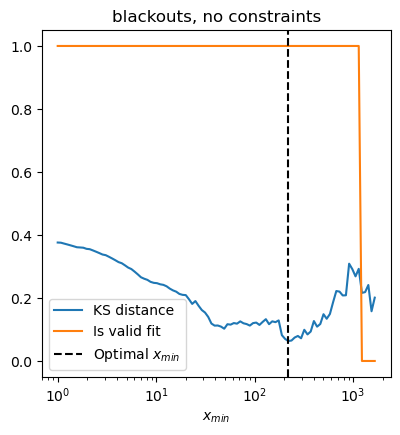

In [11]:
data = powerlaw.load_test_dataset('blackouts')

fit = powerlaw.Fit(data / 1e3)

plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["distances"], label='KS distance')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["valid_fits"], label='Is valid fit')

plt.axvline(fit.xmin, linestyle='--', c='black', label='Optimal $x_{min}$')

plt.xlabel('$x_{min}$')

plt.legend()
plt.xscale('log')
plt.title('blackouts, no constraints')
plt.gcf().set_size_inches((4.5,4.5))
savefig('blackouts_xmin.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|█████████████████████████| 100/100 [00:00<00:00, 2708.29it/s]


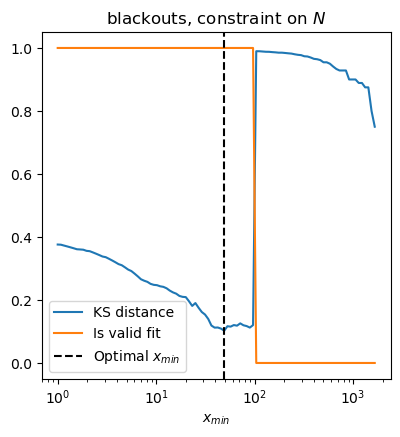

In [12]:
data = powerlaw.load_test_dataset('blackouts')

def constraint(dist):
    N = 100
    return len(dist.data) - N

constraint_dict = {"type": 'ineq',
                   "fun": constraint,
                   "dists": ['power_law']}

fit = powerlaw.Fit(data / 1e3, parameter_constraints=constraint_dict)

plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["distances"], label='KS distance')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["valid_fits"], label='Is valid fit')

plt.axvline(fit.xmin, linestyle='--', c='black', label='Optimal $x_{min}$')

plt.xlabel('$x_{min}$')

plt.legend()
plt.xscale('log')
plt.title('blackouts, constraint on $N$')
plt.gcf().set_size_inches((4.5,4.5))
savefig('blackouts_xmin_constrained.png')
plt.show()

/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:188: UserWarning: discrete=False but data exclusively contains integer values. Consider using discrete=True.
  warnings.warn('discrete=False but data exclusively contains integer values. Consider using discrete=True.')


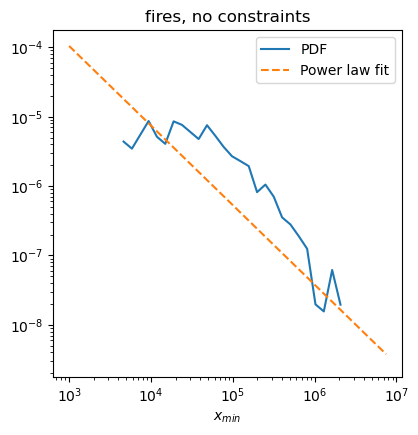

In [13]:
data = powerlaw.load_test_dataset('blackouts')

powerlaw.plot_pdf(data, label='PDF')
pl = powerlaw.Power_Law(data=data, xmin=100)

pl.plot_pdf(linestyle='--', label='Power law fit')

plt.xlabel('$x_{min}$')

plt.legend()
plt.xscale('log')
plt.title('fires, no constraints')
plt.gcf().set_size_inches((4.5,4.5))
#savefig('blackouts_xmin.png')
plt.show()

## Continuous and discrete data

/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:1890: UserWarning: estimate_discrete=True but xmin is quite small (1.0). This may give inaccurate results.
  warnings.warn(f'estimate_discrete=True but xmin is quite small ({self.xmin}). This may give inaccurate results.')


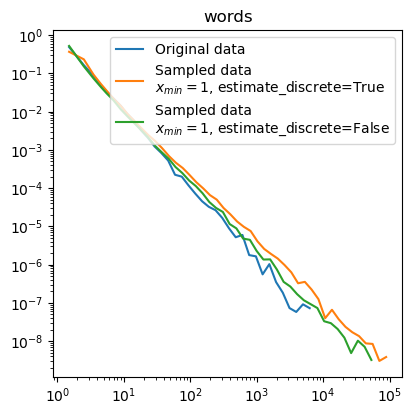

In [14]:
data = powerlaw.load_test_dataset('words')

powerlaw.plot_pdf(data[data >= 1], label='Original data')

np.random.seed(0)
fit = powerlaw.Fit(data, xmin=1, discrete=True, estimate_discrete=True)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 1$, estimate_discrete=True')

np.random.seed(0)
fit = powerlaw.Fit(data, xmin=1, discrete=True, estimate_discrete=False)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 1$, estimate_discrete=False')

plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_generation_1_xmin.png')
plt.show()

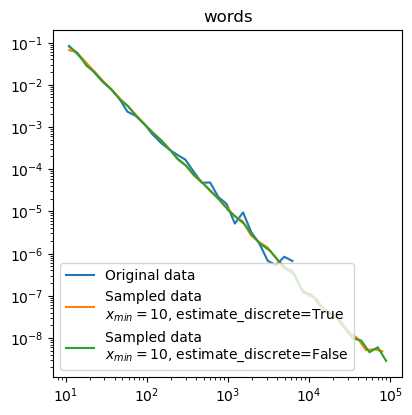

In [15]:
data = powerlaw.load_test_dataset('words')

powerlaw.plot_pdf(data[data >= 10], label='Original data')

np.random.seed(0)
fit = powerlaw.Fit(data, xmin=10, discrete=True, estimate_discrete=True)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 10$, estimate_discrete=True')

np.random.seed(0)
fit = powerlaw.Fit(data, xmin=10, discrete=True, estimate_discrete=False)
samples = fit.power_law.generate_random(size=(100000))
samples = samples[samples <= 1e5]
powerlaw.plot_pdf(samples, label='Sampled data\n$x_{min} = 10$, estimate_discrete=False')

plt.legend()
plt.title('words')
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_generation_10_xmin.png')
plt.show()

## Comparing distributions

Calculating best minimal value for power law fit


Fitting xmin: 100%|█████████████████████████| 100/100 [00:00<00:00, 2311.43it/s]
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:188: UserWarning: discrete=False but data exclusively contains integer values. Consider using discrete=True.
  warnings.warn('discrete=False but data exclusively contains integer values. Consider using discrete=True.')
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:816: UserWarning: Fitted parameters are very close to the edge of parameter ranges for distribution exponential; consider changing these ranges.
  warnings.warn(f'Fitted parameters are very close to the edge of parameter ranges for distribution {self.name}; consider changing these ranges.')


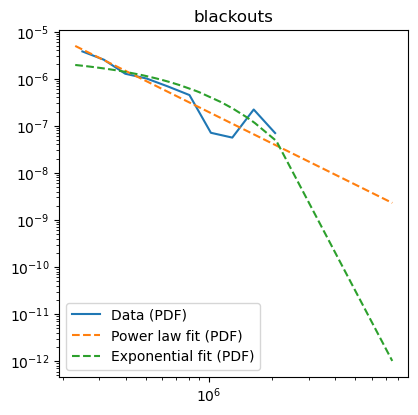

(1.2192588267723772, 0.22274597056705703)


In [16]:
data = powerlaw.load_test_dataset('blackouts')

fit = powerlaw.Fit(data)

fit.plot_pdf(label='Data (PDF)')
fit.power_law.plot_pdf(linestyle='--', label='Power law fit (PDF)')
fit.exponential.plot_pdf(linestyle='--', label='Exponential fit (PDF)')

plt.title('blackouts')
plt.legend()
plt.gcf().set_size_inches((4.5,4.5))
savefig('blackouts_compare.png')

plt.show()

print(fit.distribution_compare('power_law', 'exponential',
                               normalized_ratio=True))

Calculating best minimal value for power law fit


Fitting xmin: 100%|███████████████████████| 1885/1885 [00:01<00:00, 1129.81it/s]


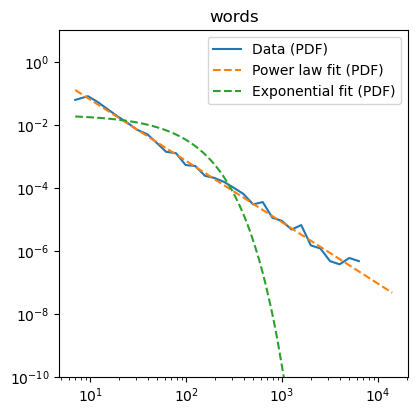

(9.113578474270525, 7.970852311739048e-20)


In [17]:
data = powerlaw.load_test_dataset('words')

fit = powerlaw.Fit(data, discrete=True)

fit.plot_pdf(label='Data (PDF)')
fit.power_law.plot_pdf(linestyle='--', label='Power law fit (PDF)')
fit.exponential.plot_pdf(linestyle='--', label='Exponential fit (PDF)')

plt.title('words')
plt.legend()
plt.ylim([1e-10, 1e1])
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_compare.png')

plt.show()

print(fit.distribution_compare('power_law', 'exponential',
                               normalized_ratio=True))

Calculating best minimal value for power law fit


Fitting xmin: 100%|███████████████████████| 1885/1885 [00:01<00:00, 1189.99it/s]
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:784: UserWarning: No valid fits found for distribution lognormal.
  warnings.warn(f"No valid fits found for distribution {self.name}.")


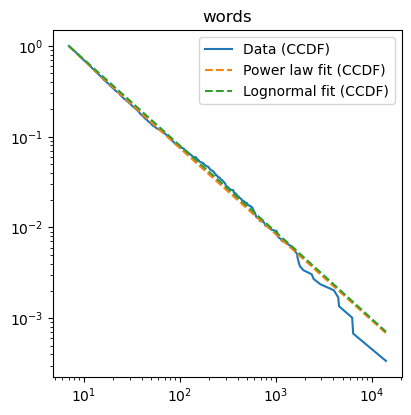

(0.5552051556985961, 0.5787543428473609)


In [18]:
data = powerlaw.load_test_dataset('words')

fit = powerlaw.Fit(data, discrete=True)

fit.plot_ccdf(label='Data (CCDF)')
fit.power_law.plot_ccdf(linestyle='--', label='Power law fit (CCDF)')
fit.lognormal.plot_ccdf(linestyle='--', label='Lognormal fit (CCDF)')

plt.title('words')
plt.legend()
#plt.ylim([1e-10, 1e1])
plt.gcf().set_size_inches((4.5,4.5))
savefig('words_compare_lognormal.png')

plt.show()

print(fit.distribution_compare('power_law', 'lognormal',
                               normalized_ratio=True))

## Generating data

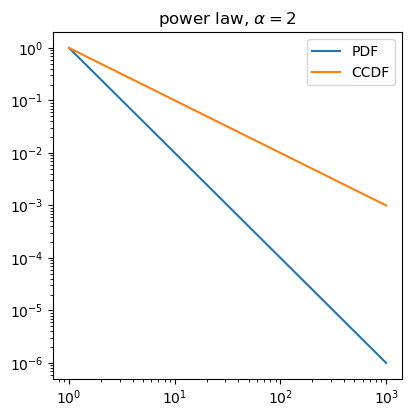

In [19]:
pl = powerlaw.Power_Law(xmin=1, parameters={'alpha': 2.0})
pl = powerlaw.Power_Law(xmin=1, parameters=[2.0])
pl = powerlaw.Power_Law(xmin=1, alpha=2.0)

pl.plot_pdf(label='PDF')
pl.plot_ccdf(label='CCDF')
plt.legend()
plt.title('power law, $\\alpha = 2$')
plt.gcf().set_size_inches((4.5,4.5))
savefig('powerlaw_slope_2.png')
plt.show()

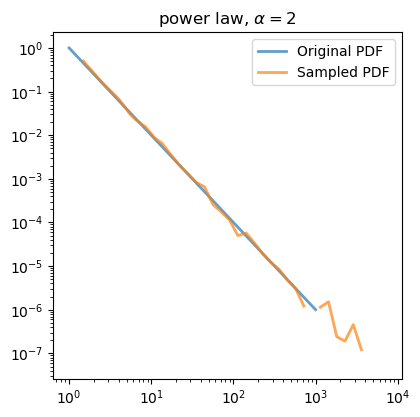

In [20]:
pl = powerlaw.Power_Law(xmin=1, parameters={'alpha': 2.0})
pl = powerlaw.Power_Law(xmin=1, parameters=[2.0])
pl = powerlaw.Power_Law(xmin=1, alpha=2.0)

pl.plot_pdf(label='Original PDF', alpha=0.7, linewidth=2)
samples = pl.generate_random((10000,))
powerlaw.plot_pdf(samples, label='Sampled PDF', alpha=0.7, linewidth=2)

plt.legend()
plt.title('power law, $\\alpha = 2$')
plt.gcf().set_size_inches((4.5,4.5))
savefig('powerlaw_slope_2_sampled.png')
plt.show()

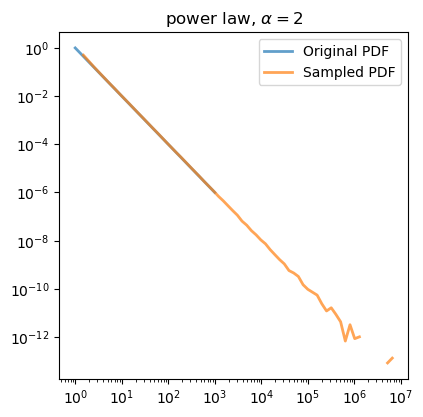

In [21]:
pl = powerlaw.Power_Law(xmin=1, alpha=2.0)

pl.plot_pdf(label='Original PDF', alpha=0.7, linewidth=2)
samples = pl.generate_random((10000000,))
powerlaw.plot_pdf(samples, label='Sampled PDF', alpha=0.7, linewidth=2)

plt.legend()
plt.title('power law, $\\alpha = 2$')
plt.gcf().set_size_inches((4.5,4.5))
savefig('powerlaw_slope_2_sampled_large_n.png')
plt.show()

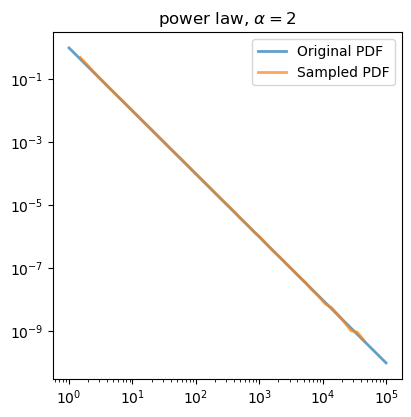

In [22]:
pl = powerlaw.Power_Law(xmin=1, xmax=1e5, alpha=2.0)

pl.plot_pdf(label='Original PDF', alpha=0.7, linewidth=2)
samples = pl.generate_random((10000000,))
powerlaw.plot_pdf(samples, label='Sampled PDF', alpha=0.7, linewidth=2)

plt.legend()
plt.title('power law, $\\alpha = 2$')
plt.gcf().set_size_inches((4.5,4.5))
savefig('powerlaw_slope_2_sampled_bounded.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|███████████████████████| 1277/1277 [00:00<00:00, 2967.42it/s]
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:188: UserWarning: discrete=False but data exclusively contains integer values. Consider using discrete=True.
  warnings.warn('discrete=False but data exclusively contains integer values. Consider using discrete=True.')


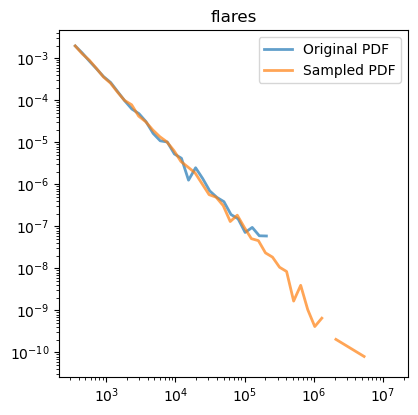

In [23]:
data = powerlaw.load_test_dataset('flares')

fit = powerlaw.Fit(data)

fit.plot_pdf(label='Original PDF', alpha=0.7, linewidth=2)
samples = fit.power_law.generate_random((10000,))
powerlaw.plot_pdf(samples, label='Sampled PDF', alpha=0.7, linewidth=2)

plt.legend()
plt.title('flares')
plt.gcf().set_size_inches((4.5,4.5))
savefig('flares_random_samples.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|███████████████████████| 1277/1277 [00:00<00:00, 2771.00it/s]
/home/jack/Workspaces/python/powerlaw/powerlaw/distributions.py:188: UserWarning: discrete=False but data exclusively contains integer values. Consider using discrete=True.
  warnings.warn('discrete=False but data exclusively contains integer values. Consider using discrete=True.')


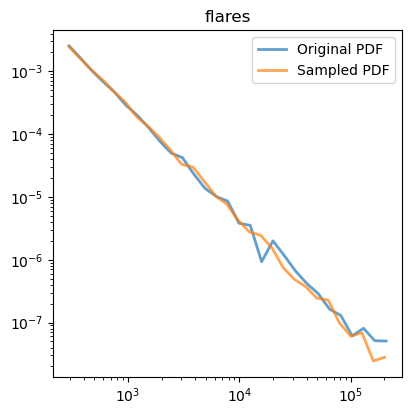

In [24]:
data = powerlaw.load_test_dataset('flares')

fit = powerlaw.Fit(data, xmax=np.max(data))

fit.plot_pdf(label='Original PDF', alpha=0.7, linewidth=2)
samples = fit.power_law.generate_random((10000,))
powerlaw.plot_pdf(samples, label='Sampled PDF', alpha=0.7, linewidth=2)

plt.legend()
plt.title('flares')
plt.gcf().set_size_inches((4.5,4.5))
savefig('flares_random_samples_bounded.png')
plt.show()

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 27.58it/s]


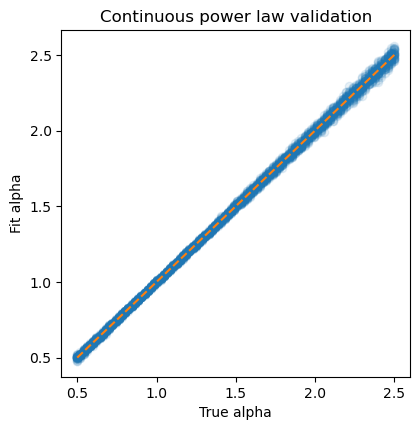

In [25]:
from tqdm import tqdm

np.random.seed(0)

alphaArr = np.linspace(0.5, 2.5, 100)
numSamples = 30 # per alpha value
N = 3000

fitAlphaArr = np.zeros((len(alphaArr), numSamples))

for j in tqdm(range(len(alphaArr))):
    for k in range(numSamples):
        theoretical_dist = powerlaw.Power_Law(xmin=1, xmax=1e6, parameters=[alphaArr[j]])
        data = theoretical_dist.generate_random(N)
        
        fit = powerlaw.Fit(data, xmin=1, xmax=np.max(data))

        fitAlphaArr[j,k] = fit.power_law.alpha


plt.plot(alphaArr, alphaArr, '--', c='tab:orange')
for i in range(len(alphaArr)):
    plt.scatter(np.repeat(alphaArr[i], numSamples), fitAlphaArr[i], alpha=0.1, c='tab:blue')

plt.xlabel('True alpha')
plt.ylabel('Fit alpha')

plt.title('Continuous power law validation')
plt.gcf().set_size_inches((4.5,4.5))
savefig('random_gen_validation_continuous.png')

plt.show()

In [26]:
from tqdm import tqdm

np.random.seed(0)

alphaArr = np.linspace(1.5, 2.5, 30)
numSamples = 30 # per alpha value
N = 3000

fitAlphaArr = np.zeros((2, len(alphaArr), numSamples))

for i in range(2):
    for j in tqdm(range(len(alphaArr))):
        for k in range(numSamples):
            # xmin = 10 because too low of a value will cause problems for discrete data
            theoretical_dist = powerlaw.Power_Law(xmin=100, xmax=1e6, parameters=[alphaArr[j]], discrete=i)
            data = theoretical_dist.generate_random(N, estimate_discrete=True)
            
            if bool(i):
                data = data.astype(np.int64)
                
            fit = powerlaw.Fit(data, xmin=100, xmax=np.max(data), fit_method='KS', verbose=1, discrete=i)
    
            fitAlphaArr[i,j,k] = fit.power_law.alpha

100%|███████████████████████████████████████████| 30/30 [00:05<00:00,  5.42it/s]


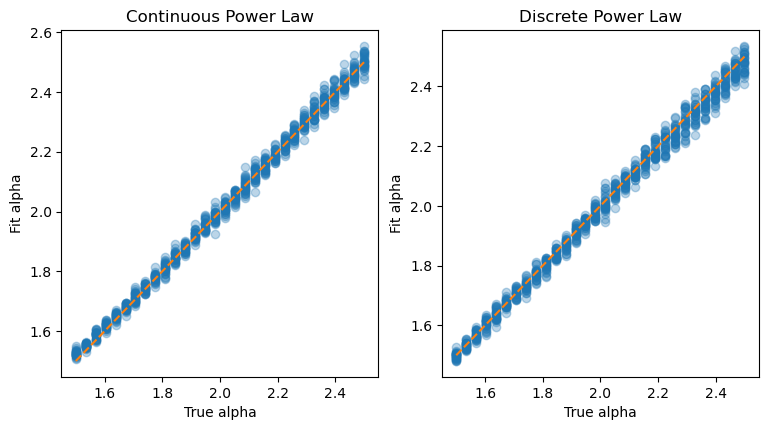

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(9,4.5))

for i in range(2):
    ax[i].plot(alphaArr, alphaArr, '--', c='tab:orange')
    
    for j in range(len(alphaArr)):
        ax[i].scatter(np.repeat(alphaArr[j], numSamples), fitAlphaArr[i][j], alpha=0.3, c='tab:blue')

    ax[i].set_xlabel('True alpha')
    ax[i].set_ylabel('Fit alpha')

ax[0].set_title('Continuous Power Law')
ax[1].set_title('Discrete Power Law')

plt.show()

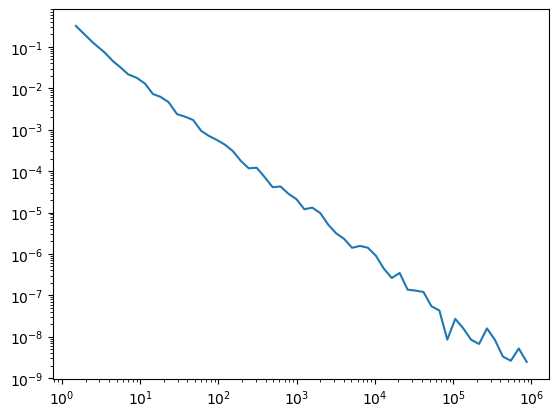

1.4052348030173936

In [29]:
theoretical_dist = powerlaw.Power_Law(xmin=1, xmax=1e6, parameters=[1.4], discrete=True, estimate_discrete=False)
data = theoretical_dist.generate_random(N*2)

powerlaw.plot_pdf(data)
plt.show()

fit = powerlaw.Fit(data, xmin=1, xmax=np.max(data), fit_method='KS', verbose=1, discrete=True)
fit.power_law.alpha

## Advanced topics

Calculating best minimal value for power law fit


Fitting xmin: 100%|█████████████████████████| 100/100 [00:00<00:00, 2288.94it/s]


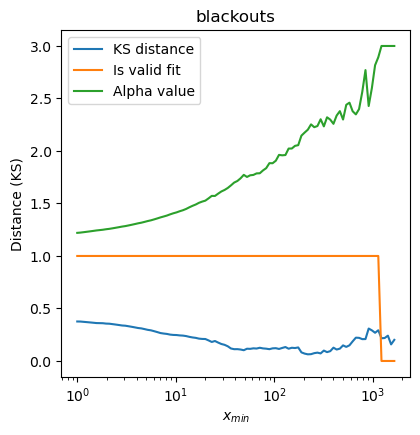

In [31]:
data = powerlaw.load_test_dataset('blackouts')

fit = powerlaw.Fit(data / 1e3)

plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["distances"], label='KS distance')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["valid_fits"], label='Is valid fit')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["alpha"], label='Alpha value')

plt.xlabel('$x_{min}$')
plt.ylabel('Distance (KS)')

plt.legend()
plt.xscale('log')
plt.title('blackouts')
plt.gcf().set_size_inches((4.5,4.5))
savefig('blackouts_multiple_fits.png')
plt.show()

Calculating best minimal value for power law fit


Fitting xmin: 100%|██████████████████████████| 100/100 [00:00<00:00, 895.31it/s]


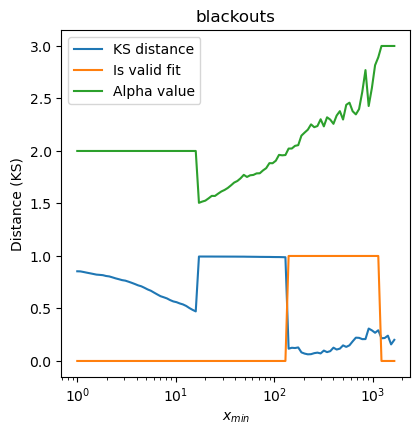

In [32]:
data = powerlaw.load_test_dataset('blackouts')

fit = powerlaw.Fit(data / 1e3, parameter_ranges={"alpha": [2, 3]})

plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["distances"], label='KS distance')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["valid_fits"], label='Is valid fit')
plt.plot(fit.xmin_fitting_results["xmins"], fit.xmin_fitting_results["alpha"], label='Alpha value')

plt.xlabel('$x_{min}$')
plt.ylabel('Distance (KS)')

plt.legend()
plt.xscale('log')
plt.title('blackouts')
plt.gcf().set_size_inches((4.5,4.5))
savefig('blackouts_multiple_fits_bounded.png')
plt.show()